In [21]:
from __future__ import print_function
print(__doc__)
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model

Automatically created module for IPython interactive environment


In [22]:
diabetes = datasets.load_diabetes()
number_examples = 200

X = diabetes.data[:number_examples]
y = diabetes.target[:number_examples]

ridge = linear_model.Ridge()
lasso = linear_model.Lasso()

alphas = np.logspace(-3,3,10)
print (alphas)
n_samples = 150
n_samples_train = 100

X_train, X_test = X[:n_samples_train], X[n_samples_train:]
y_train, y_test = y[:n_samples_train], y[n_samples_train:]

train_errors_ridge = list()
train_errors_lasso = list()
test_errors_ridge  = list()
test_errors_lasso  = list()

coefs_ridge = []
coefs_lasso = []

[1.00000000e-03 4.64158883e-03 2.15443469e-02 1.00000000e-01
 4.64158883e-01 2.15443469e+00 1.00000000e+01 4.64158883e+01
 2.15443469e+02 1.00000000e+03]


Text(0.5, 1.0, 'Lasso')

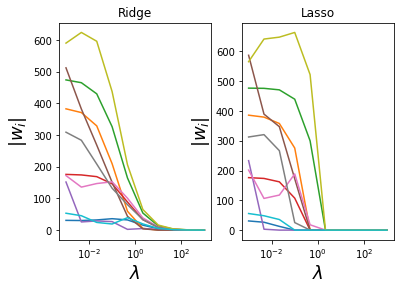

In [23]:
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train,y_train)
    coefs_ridge.append(ridge.coef_)
    train_errors_ridge.append(ridge.score(X_train,y_train))
    test_errors_ridge.append(ridge.score(X_test,y_test))
    
    lasso.set_params(alpha=a)
    lasso.fit(X_train,y_train)
    coefs_lasso.append(lasso.coef_)
    train_errors_lasso.append(lasso.score(X_train,y_train))
    test_errors_lasso.append(lasso.score(X_train,y_train))
    
    
plt.subplot(1,2,1)
plt.semilogx(alphas,np.abs(coefs_ridge))
axes = plt.gca()
plt.xlabel(r'$\lambda$',fontsize=18)
plt.ylabel(r'$|w_i|$',fontsize=18)
plt.title('Ridge')

plt.subplot(1,2,2)
plt.semilogx(alphas,np.abs(coefs_lasso))
axes = plt.gca()
plt.xlabel(r'$\lambda$',fontsize=18)
plt.ylabel(r'$|w_i|$',fontsize=18)
plt.title('Lasso')



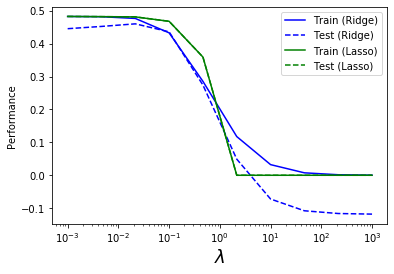

[ 0.04849037  0.00456967  0.14041612  0.09116069  0.02268634  0.00434845
 -0.10684245  0.09659595  0.16683922  0.05916215]


In [24]:
plt.semilogx(alphas, train_errors_ridge, 'b', label='Train (Ridge)')
plt.semilogx(alphas, test_errors_ridge, '--b', label='Test (Ridge)')
plt.semilogx(alphas, train_errors_lasso, 'g', label='Train (Lasso)')
plt.semilogx(alphas, test_errors_lasso, '--g', label='Test (Lasso)')
plt.legend(loc='best')
plt.xlabel(r'$\lambda$',fontsize=18)
plt.ylabel('Performance')
plt.show()
print (ridge.coef_)

In [25]:
from sklearn.model_selection import train_test_split
diabetes = datasets.load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(diabetes.data,diabetes.target,test_size=0.2)
print (X_train.shape)
print (y_train.shape)

(353, 10)
(353,)


/Users/boyaozhu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/boyaozhu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/boyaozhu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/boyaozhu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarni

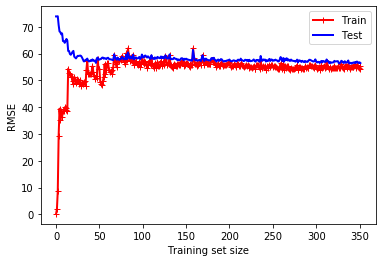

In [28]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
train_errors, val_errors = [], []


for i in range(1,X_train.shape[0]):
    sgd_reg.fit(X_train[:i],y_train[:i])
    y_train_predict = sgd_reg.predict(X_train[:i])
    y_test_predict = sgd_reg.predict(X_test)
    
    train_errors.append(mean_squared_error(y_train[:i],y_train_predict))
    val_errors.append(mean_squared_error(y_test,y_test_predict))
plt.plot(np.sqrt(train_errors),'r-+',lw=2,label='Train')
plt.plot(np.sqrt(val_errors),'b-',lw=2,label='Test')
plt.xlabel('Training set size')
plt.ylabel('RMSE')
plt.legend()
plt.show()


